In [1]:
import sys
sys.path.append("..")

from configs.plot_config import apply_plot_settings
from configs.math_functions import F, gaussian, lognormal
from configs.parameters import *
from configs.filenames import *

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch
from scipy.signal import find_peaks
from scipy.stats import lognorm
import scipy.interpolate as interp
from scipy.optimize import curve_fit
import os
import math

print(f"📢 Using parameters: C={C}, itr={itr}, sig={sig}")

📢 Using parameters: C=0.01, itr=20000, sig=0.1


In [2]:
apply_plot_settings()
output_dir = "../data/"

In [3]:
def format_sig(sig):
    rounded = round(sig, 2)
    return f"{rounded:.1f}" if rounded * 10 % 1 == 0 else f"{rounded:.2f}"

# $\sigma$ sweep

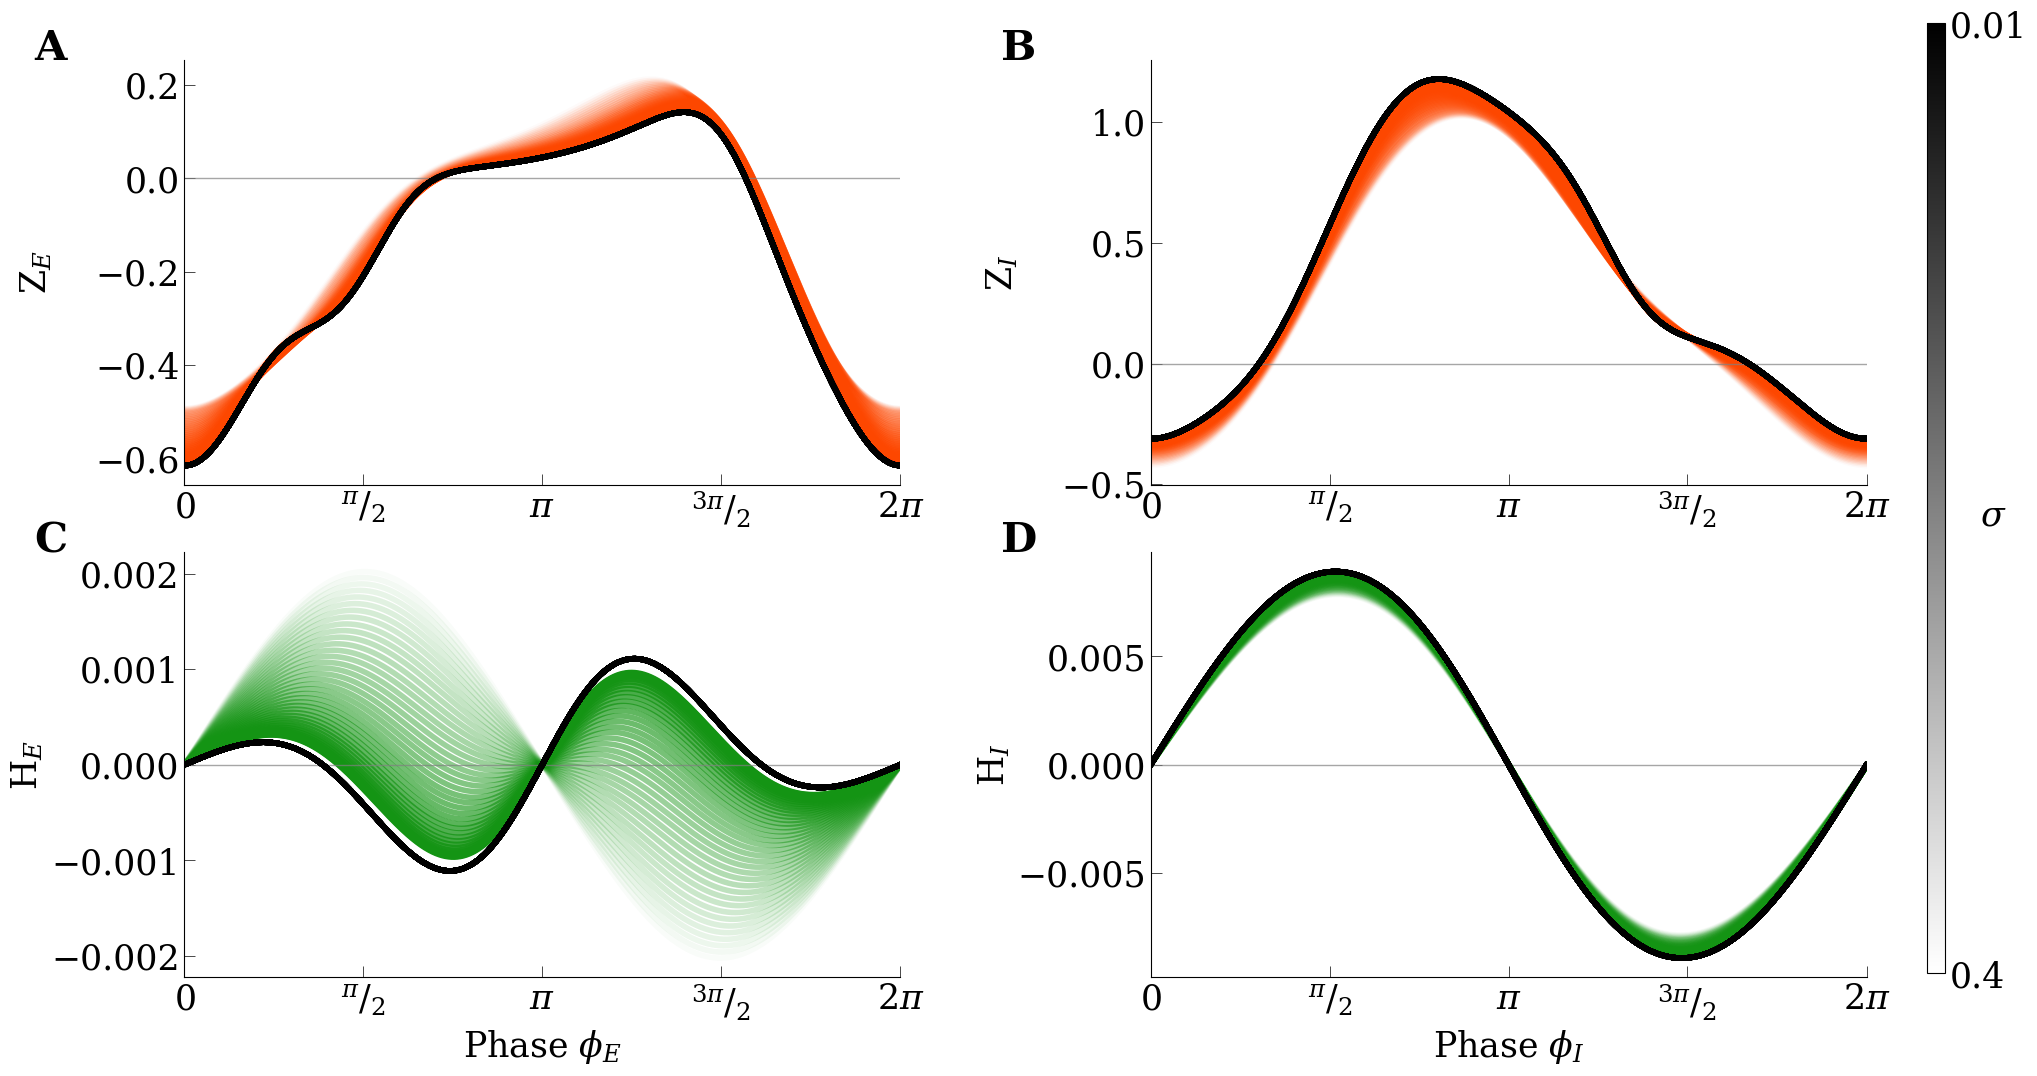

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
fig.tight_layout()

ax3 = plt.subplot(221)
ax4 = plt.subplot(222)
ax5 = plt.subplot(223)
ax6 = plt.subplot(224)

sig_range = np.arange(0.01,0.41,0.01)
i = 0
    
for sig in sig_range:
    i +=1
    sig = format_sig(sig)
    if sig == 0.10 or sig == 0.20 or sig == 0.30 or sig == 0.40:
        continue
    else:
        
        #print(sig)
        params = get_params_for_filename(param_keys, globals())

        filename = get_filename("discrete", "Interaction", **params)
        savefile_interaction = os.path.join(output_dir, filename)
        data = np.load(savefile_interaction, allow_pickle=True)
        t_01 = data["tt"]
        H_odd_EE_01 = data["H_odd_EE"]
        ZE_01 = data["ZE"]
        tE_01 = data["tE"]
        H_odd_II_01 = data["H_odd_II"]
        ZI_01 = data["ZI"]
        tI_01 = data["tI"]
        T_01 = data["T"]

        filename = get_filename("gaussian", "Interaction", **params)
        savefile_interaction = os.path.join(output_dir, filename)
        data = np.load(savefile_interaction, allow_pickle=True)
        t = data["tt"]
        H_odd_EE = data["H_odd_EE"]
        ZE = data["ZE"]
        tE = data["tE"]
        H_odd_II = data["H_odd_II"]
        ZI = data["ZI"]
        tI = data["tI"]
        T = data["T"]

        #print('Refernece period=', T_01)
        #print('Period=', T)

        Start_idx = 0
        Start = int(Start_idx)
        Stop = T_01
        Stop_idx = int(T_01/dt)

        t_01 = t_01[:Stop_idx]
        H_odd_EE_01 = H_odd_EE_01[:Stop_idx]
        H_odd_II_01 = H_odd_II_01[:Stop_idx]
        ZE_01 = ZE_01[:Stop_idx]
        ZI_01 = ZI_01[:Stop_idx]

        zero = Start*dt
        pi2 = (Start + int((T_01/4)/dt)) * dt
        pi = (Start + int((T_01/2)/dt)) * dt
        pi34 = (Start + int((T_01*3/4)/dt)) * dt
        twopi = (Start + int((T_01)/dt)) * dt

        ### PRC
        #######

        ZE_interp = interp.interp1d(np.arange(ZE.size), ZE)
        ZE_compress = ZE_interp(np.linspace(0,ZE.size-1, ZE_01.size))
        ZI_interp = interp.interp1d(np.arange(ZI.size), ZI)
        ZI_compress = ZI_interp(np.linspace(0,ZI.size-1, ZI_01.size))
        ax3.plot(tE_01, ZE_01, color = 'black', linewidth = 4, zorder = 10)
        ax4.plot(tI_01, ZI_01, color = 'black', linewidth = 4, zorder = 10)
        ax3.plot(np.linspace(zero,twopi,ZE_compress.size), ZE_compress, label = r'$\sigma$ = {sig}', color = '#FD4700', linewidth = 4, alpha = 1 - ((i-1)*1)/len(sig_range))
        ax4.plot(np.linspace(zero,twopi,ZI_compress.size), ZI_compress, label = r'$\sigma$ = {sig}', color = '#FD4700', linewidth = 4, alpha = 1 - ((i-1)*1)/len(sig_range))

        ### Interaction function
        ########################

        H_odd_EE_interp = interp.interp1d(np.arange(H_odd_EE.size), H_odd_EE)
        H_odd_EE_compress = H_odd_EE_interp(np.linspace(0,H_odd_EE.size-1, H_odd_EE_01.size))
        H_odd_II_interp = interp.interp1d(np.arange(H_odd_II.size), H_odd_II)
        H_odd_II_compress = H_odd_II_interp(np.linspace(0,H_odd_II.size-1, H_odd_II_01.size))
        ax5.plot(tE_01, H_odd_EE_01, color = 'black', linewidth = 4, zorder = 10)
        ax6.plot(tI_01, H_odd_II_01, color = 'black', linewidth = 4, zorder = 10)
        ax5.plot(np.linspace(Start_idx,Stop,H_odd_EE_compress.size), H_odd_EE_compress, color = '#149414', linewidth = 4, alpha = 1 - ((i-1)*1)/len(sig_range))
        ax6.plot(np.linspace(Start_idx,Stop,H_odd_II_compress.size), H_odd_II_compress, color = '#149414', linewidth = 4, alpha = 1 - ((i-1)*1)/len(sig_range))

FONTSIZE = 30

ax3.axhline(c='grey', lw=1, alpha=0.7)
ax3.set_xlim(zero,twopi)
ax3.set_ylabel('Z$_E$', labelpad=30)
ax3.set_xticks([zero, pi2, pi, pi34, twopi])
ax3.tick_params(direction='in', length=8, width=0.5, colors='black', top = False, right = False)
ax3.annotate('A', xy=(-0.21,1), xycoords='axes fraction', fontsize = FONTSIZE, weight = "bold")
ax3.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))

ax4.axhline(c='grey', lw=1, alpha=0.7)
ax4.set_xlim(zero,twopi)
ax4.set_ylabel('Z$_I$', labelpad=30)
ax4.set_xticks([zero, pi2, pi, pi34, twopi])
ax4.tick_params(direction='in', length=8, width=0.5, colors='black', top = False, right = False)
ax4.annotate('B', xy=(-0.21,1), xycoords='axes fraction', fontsize = FONTSIZE, weight = "bold")
ax4.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))

ax5.axhline(c='grey', lw=1, alpha=0.7)
ax5.set_xlim(zero,twopi)
ax5.set_xticks([zero, pi2, pi, pi34, twopi])
ax5.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax5.set_ylabel('H$_E$')
ax5.set_xlabel(r'Phase $\phi_E$')
ax5.tick_params(direction='in', length=8, width=0.5, colors='black', top = False, right = False)
ax5.annotate('C', xy=(-0.21,1), xycoords='axes fraction', fontsize = FONTSIZE, weight = "bold")

ax6.axhline(c='grey', lw=1, alpha=0.7)
ax6.set_xlim(zero,twopi)
ax6.set_xticks([zero, pi2, pi, pi34, twopi])
ax6.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax6.set_ylabel('H$_I$')
ax6.set_xlabel(r'Phase $\phi_I$')
ax6.tick_params(direction='in', length=8, width=0.5, colors='black', top = False, right = False)
ax6.annotate('D', xy=(-0.21,1), xycoords='axes fraction', fontsize = FONTSIZE, weight = "bold")

ax = fig.add_axes([1.01, 0.058, 0.01, 0.95])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', cmap=mpl.cm.binary)
cb.set_ticks([0,1.0])
cb.set_ticklabels(['{0:.1f}'.format(len(sig_range)*0.01),'0.01'])
cb.set_label('$\sigma$', rotation=0, labelpad=-25)

plt.subplots_adjust(wspace=0.35)
plt.savefig("../figures/fig6.pdf", bbox_inches="tight")
plt.show()